# Playing around with events dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns

In [2]:
import sys  
sys.path.insert(0, '/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data')

In [3]:
import Metrica_IO_CF as mio
import Metrica_Viz_CF_ADJ as mviz
import Metrica_Viz_CF as mviz_old
import Metrica_Velocities_CF as mvel
import matplotlib.animation as manimation

In [4]:
DATADIR = "/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data"

In [5]:
events_eda=pd.read_csv(DATADIR+'/2057613_insight_resort.csv')

In [6]:
events=pd.read_csv(DATADIR+'/events_cleaned.csv')

In [7]:
tracking_home=pd.read_csv(DATADIR+'/tracking_home.csv')
tracking_away=pd.read_csv(DATADIR+'/tracking_away.csv')

In [8]:
events=events.set_index('index')

In [9]:
tracking_home=tracking_home.set_index('frameIdx')
tracking_away=tracking_away.set_index('frameIdx')

In [10]:
events

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],Period,SIDE_OF_PITCH,Subtype
index,,,,,,,,,,,,,
0,Home,32,NaN,NaN,50.3500,34.000,NaN,NaN,0.0,0.00,1,Right,Start
1,Away,32,NaN,NaN,-50.3500,-34.000,NaN,NaN,0.0,0.00,1,Right,Start
2,Away,1,62839.0,156787.0,0.2014,0.000,-15.8099,-0.272,9.0,0.36,1,Left,Pass
3,Away,1,156787.0,455605.0,-15.8099,-0.272,-16.4141,-9.656,57.0,2.28,1,Right,Pass
4,Away,1,455605.0,110618.0,-16.4141,-9.656,-30.3107,-10.744,89.0,3.56,1,Right,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,Home,1,219527.0,151940.0,-5.5385,-15.504,-4.5315,6.188,138522.0,5540.88,2,Left,Pass
1766,Home,1,151940.0,82526.0,-12.7889,7.344,-28.8002,-28.968,138659.0,5546.36,2,Right,Pass
1767,Home,1,82526.0,219527.0,-27.1890,-27.540,-22.0533,-19.992,138770.0,5550.80,2,Left,Pass


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

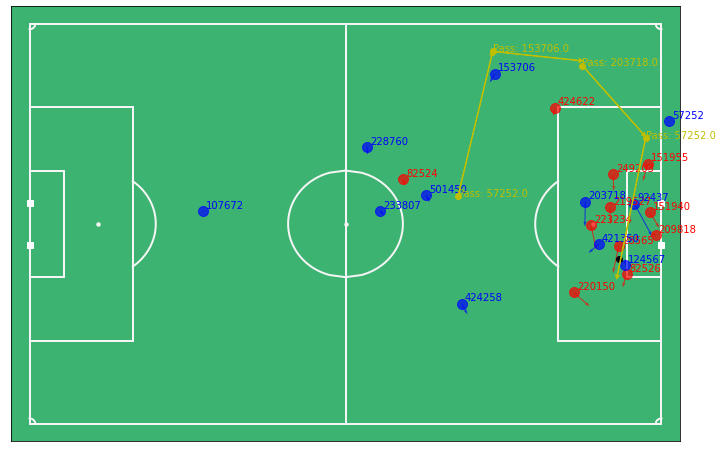

In [11]:
# plot a random frame, plotting the player velocities using quivers

fig,ax=mviz_old.plot_frame(tracking_home.loc[102161], tracking_away.loc[102161], include_player_velocities=True, annotate=True)

# plot the 4 events leading up to the second goal
mviz_old.plot_events(events.loc[1311:1314], color='y', alpha=1,indicators = ['Marker','Arrow'], annotate=True, figax=(fig,ax) )

In [12]:
def isNaN(num):
    '''cute lil guy that determines if an element is nan or not'''
    return num != num

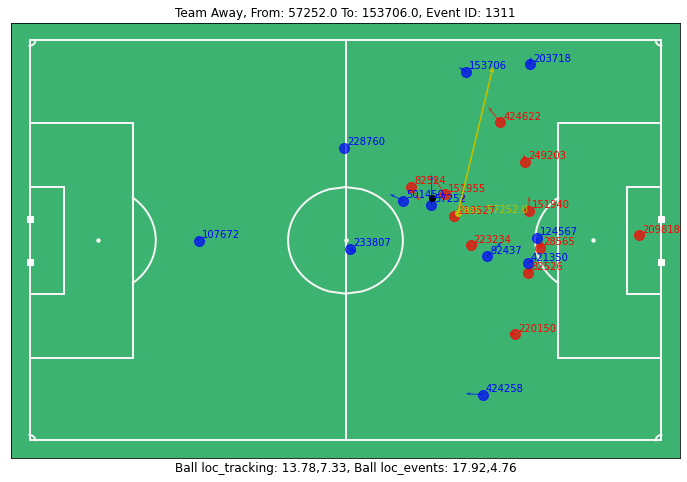

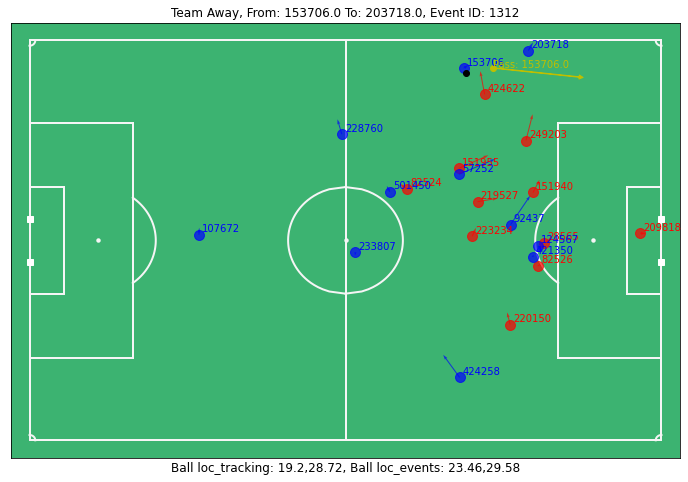

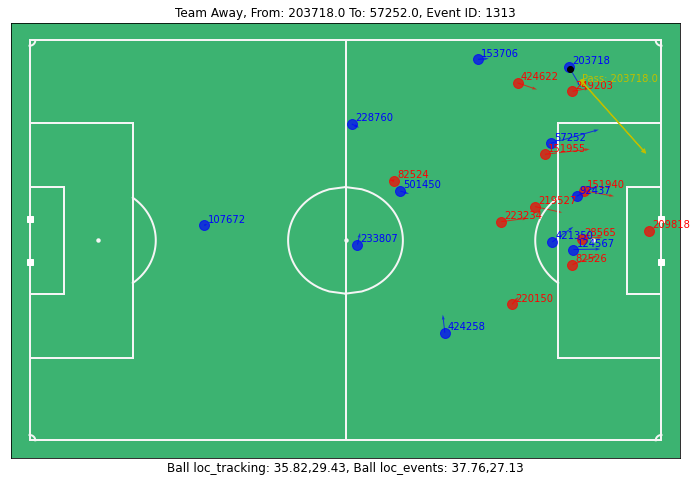

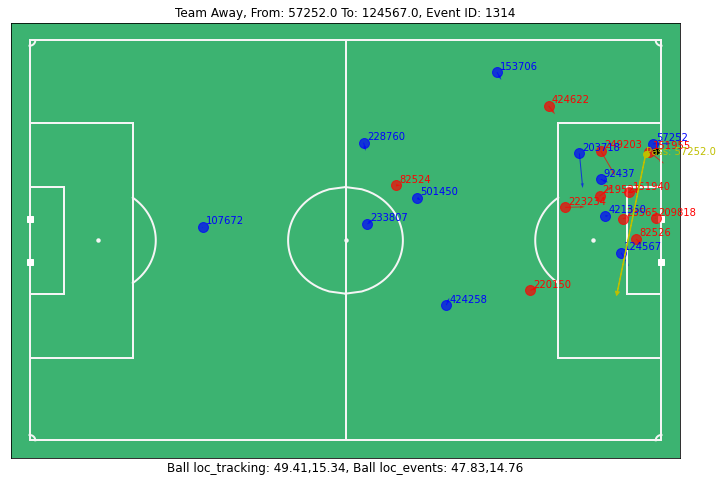

In [13]:
for i,row in events.loc[1311:1314].iterrows():
    if isNaN(row['End X']):
        print('----')
    else:
        event_frame=row['Start Frame']
        fig,ax=mviz_old.plot_frame(tracking_home.loc[event_frame], tracking_away.loc[event_frame],include_player_velocities=True, annotate=True)# plot the 3 events leading up to the second goal
        mviz_old.plot_events(pd.DataFrame(row).T.loc[i:i], color='y', alpha=1.0,indicators = ['Marker','Arrow'], annotate=True,figax = (fig,ax))

        ax.set_title("Team {}, From: {} To: {}, Event ID: {}".format(row['Team'],row['From'], row['To'],i))
        ax.set_xlabel("Ball loc_tracking: {},{}, Ball loc_events: {},{}".format(tracking_home['ball_x'].loc[event_frame],
                                                                                tracking_home['ball_y'].loc[event_frame],
                                                                                round(row['Start X'],2), round(row['Start Y'],2)),fontsize=12)



In [63]:
events_eda.head()

,X_ADJ,Y_ADJ,Team,Type,From,To,Start X,Start Y,End X,End Y,...,SHOT_QUALITY,POSSESSION_EVENTS,POSSESSION_START_CLOCK,POSSESSION_END_CLOCK,POSSESSION_START_FRAMEIDX,POSSESSION_END_FRAMEIDX,FIELD_LENGTH,FIELD_WIDTH,Event_Number,Subtype
0,0.0,0.0,Home,32,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,105,69,0,Start
1,0.0,0.0,Away,32,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,105,69,1,Start
2,52.7,34.5,Away,1,62839.0,156787.0,50.2,50.0,34.3,49.6,...,NaN,NaN,NaN,NaN,NaN,NaN,105,69,2,Pass
3,36.0,34.2,Away,1,156787.0,455605.0,34.3,49.6,33.7,35.8,...,NaN,NaN,NaN,NaN,NaN,NaN,105,69,3,Pass
4,35.4,24.7,Away,1,455605.0,110618.0,33.7,35.8,19.9,34.2,...,NaN,NaN,NaN,NaN,NaN,NaN,105,69,4,Pass


**Interesting Characteristics in events dataframe**

*Coordinates:*
- 'GK_X_COORDINATE',
- 'GK_Y_COORDINATE',
- 'GOAL_Y_COORDINATE',
- 'GOAL_Z_COORDINATE',
- 'BLOCKED_X_COORDINATE',
- 'BLOCKED_Y_COORDINATE',
- 'X_ADJ',
- 'Y_ADJ',

*Events*
- 'PASSES_SUCCESSFUL',
- 'PASSES_UNSUCCESSFUL',
-  'CROSSES_SUCCESSFUL',
- 'CROSSES_UNSUCCESSFUL',
- 'FOULS_WON',
- 'FOULS_CONCEDED',
- 'IN_BOX'
- 'TACKLES_WON',
- 'TACKLES_LOST',
- 'CLEARANCE_TOTAL',
- 'CLEARANCE_HEADED_WON',
- 'SHOTS_ON_TARGET',
- 'SHOTS_OFF_TARGET'
- 'TAKE_ON_SUCCESSFUL',
- 'TAKE_ON_UNSUCCESSFUL',
- 'DISPOSSESSED',
- 'POSSESSION_LOST',
- 'SHOT_QUALITY'
- 'SEQUENCEIDX'
- 'POSSESSION_EVENTS',
- 'POSSESSION_START_CLOCK',
- 'POSSESSION_END_CLOCK',
- 'POSSESSION_START_FRAMEIDX',
- 'POSSESSION_END_FRAMEIDX',
- 'FIELD_LENGTH',
- 'FIELD_WIDTH',
- 'Event_Number',

In [14]:
events_eda=events_eda.rename(columns={'X':'Start X','Y':'Start Y','XEND':'End X','YEND':'End Y','FRAME_IDX':'Start Frame',
                              'TYPE_ID':'Type','ATHLETE_ID_OPTA':'From','RECEIVER_ID':'To','HOME_AWAY':'Team','PERIODID':'Period'})

In [15]:
events_eda['Start Time [s]']=events_eda['Start Frame']/25

In [16]:
events_eda=events_eda[['X_ADJ','Y_ADJ','Team','Type','From','To','Start X','Start Y','End X','End Y','Start Frame','Start Time [s]',
            'Period','PASS_DIFFICULTY','PASSES_SUCCESSFUL','PASSES_UNSUCCESSFUL','CROSSES_SUCCESSFUL',
            'CROSSES_UNSUCCESSFUL','FOULS_WON','FOULS_CONCEDED','IN_BOX','TACKLES_WON','TACKLES_LOST',
             'CLEARANCE_TOTAL','CLEARANCE_HEADED_WON','SHOTS_ON_TARGET','SHOTS_OFF_TARGET', 'TAKE_ON_SUCCESSFUL',
             'TAKE_ON_UNSUCCESSFUL','DISPOSSESSED','POSSESSION_LOST','SHOT_QUALITY','SEQUENCEIDX',
             'POSSESSION_EVENTS','POSSESSION_START_CLOCK','POSSESSION_END_CLOCK','POSSESSION_START_FRAMEIDX',
            'POSSESSION_END_FRAMEIDX','FIELD_LENGTH','FIELD_WIDTH', 'Event_Number']]

## Plot which players had the most "events"

In [17]:
event_list=pd.read_csv(DATADIR+'/opta_events.csv')

In [18]:
# initializing lists 
test_keys = list(event_list['TYPE_ID'])
test_values = list(event_list['EVENT_TYPE'])
# using zip() 
# to convert lists to dictionary 
event_dict = dict(zip(test_keys, test_values)) 

In [19]:
#Creating Sybtype column
events_eda['Subtype']=0
for i in range(len( events)):
    events_eda['Subtype'].iloc[i]=event_dict[events_eda['Type'].iloc[i]]
    

/opt/anaconda3/envs/bootcamp_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '57252.0'),
  Text(1, 0, '62839.0'),
  Text(2, 0, '92437.0'),
  Text(3, 0, '107672.0'),
  Text(4, 0, '110618.0'),
  Text(5, 0, '124567.0'),
  Text(6, 0, '153706.0'),
  Text(7, 0, '156787.0'),
  Text(8, 0, '203718.0'),
  Text(9, 0, '213100.0'),
  Text(10, 0, '213563.0'),
  Text(11, 0, '228760.0'),
  Text(12, 0, '233807.0'),
  Text(13, 0, '245005.0'),
  Text(14, 0, '421350.0'),
  Text(15, 0, '421351.0'),
  Text(16, 0, '424258.0'),
  Text(17, 0, '455605.0'),
  Text(18, 0, '467743.0'),
  Text(19, 0, '479760.0'),
  Text(20, 0, '501450.0')])

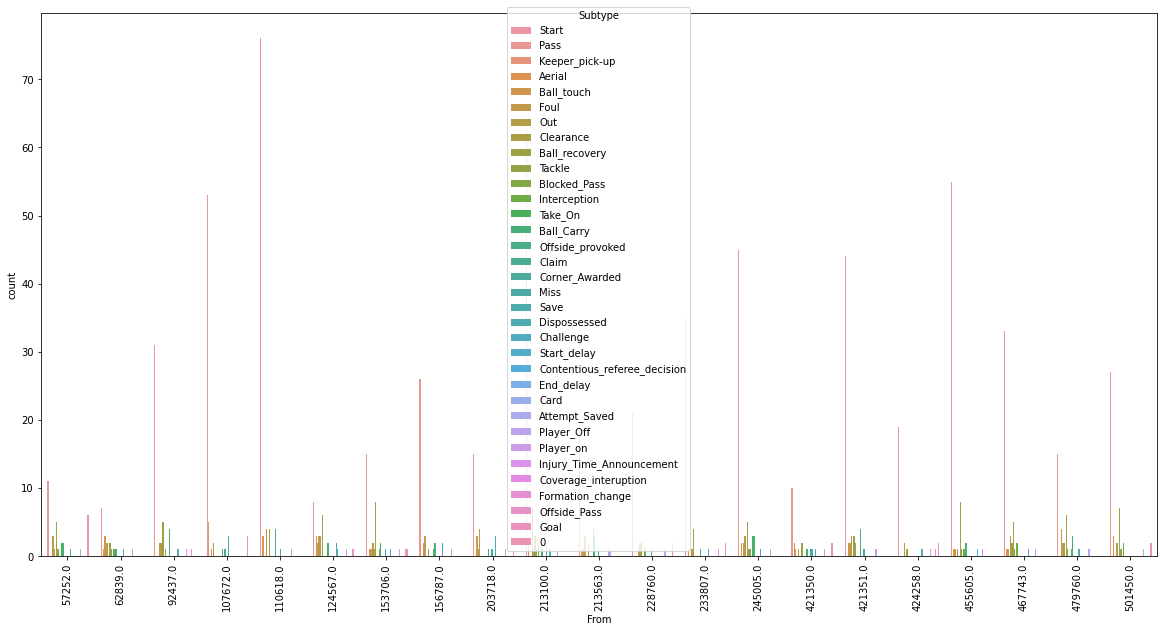

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(x='From',hue='Subtype',data=events_eda[events_eda['Team']=='Away'])
plt.xticks(rotation=90)

In [20]:
events_eda=events_eda.drop('SEQUENCEIDX',axis=1)

<AxesSubplot:xlabel='POSSESSION_LOST', ylabel='count'>

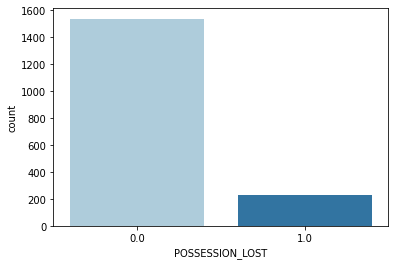

In [21]:
sns.countplot(x='POSSESSION_LOST', palette='Paired',data=events_eda)

<AxesSubplot:xlabel='DISPOSSESSED', ylabel='count'>

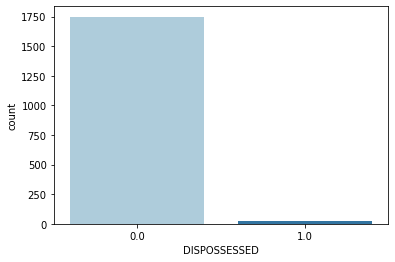

In [22]:
sns.countplot(x='DISPOSSESSED', palette='Paired',data=events_eda)

In [23]:
events_eda[['From','Event_Number','Subtype']][events_eda['Subtype']=='Challenge']\
.groupby(['From','Subtype']).count().sort_values(by='Event_Number',ascending=False)

,,Event_Number
From,Subtype,
95284.0,Challenge,3
92437.0,Challenge,1
110619.0,Challenge,1
124567.0,Challenge,1
151955.0,Challenge,1
153706.0,Challenge,1
213100.0,Challenge,1
219527.0,Challenge,1
220150.0,Challenge,1


In [24]:
events_eda[['From','Event_Number','Subtype']][events_eda['Subtype'].str.lower()=='interception']\
.groupby('From').count().sort_values(by='Event_Number',ascending=False)

,Event_Number,Subtype
From,,
425341.0,6,6
28565.0,2,2
213100.0,2,2
249203.0,2,2
467743.0,2,2
501450.0,2,2
62839.0,1,1
82526.0,1,1
110619.0,1,1


In [25]:
events_eda[['From','Event_Number','Subtype','To','DISPOSSESSED']][(events_eda['Subtype'].str.lower()=='interception')&(events_eda['From']==425341.0)]

,From,Event_Number,Subtype,To,DISPOSSESSED
34,425341.0,34,Interception,NaN,0.0
81,425341.0,81,Interception,NaN,0.0
134,425341.0,134,Interception,NaN,0.0
473,425341.0,473,Interception,NaN,0.0
502,425341.0,502,Interception,NaN,0.0
1090,425341.0,1090,Interception,NaN,0.0


#### Smart way to get frame numbers around event you are interested in to make a clip
events_eda['Start Frame'].loc[34]



In [26]:
def clip_array(frame,clip_length):
    if frame-clip_length*.75>0:
        start_frame=frame-clip_length*.75
        end_frame=frame+clip_length*.25
    elif frame-clip_length*.25>0:
        start_frame=frame-clip_length*.25
        end_frame=frame+clip_length*.75
    else:
        start_frame=frame-25
        end_frame=frame+(clip_length-25)
    return start_frame,end_frame

In [27]:
start_clip,end_clip = clip_array(events_eda['Start Frame'].loc[34],300)

In [28]:
events_eda['Start Frame'].loc[34]

2461.0

In [29]:
end_clip

2536.0

In [32]:
def plot_pitch( field_dimen = (100.7,68.6), field_color ='green', linewidth=2, markersize=20):
    """ plot_pitch
    
    Plots a soccer pitch. All distance units converted to meters.
    
    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    fig,ax = plt.subplots(figsize=(12,8)) # create a figure 
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax

In [54]:
def save_match_clip(hometeam,awayteam, fpath, fname='clip_test', figax=None, frames_per_second=25, team_colors=('r','b'), field_dimen = (100.7,68.6), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7,annotate=False):
    """ save_match_clip( hometeam, awayteam, fpath )
    
    Generates a movie from Metrica tracking data, saving it in the 'fpath' directory with name 'fname'
    
    Parameters
    -----------
        hometeam: home team tracking data DataFrame. Movie will be created from all rows in the DataFrame
        awayteam: away team tracking data DataFrame. The indices *must* match those of the hometeam DataFrame
        fpath: directory to save the movie
        fname: movie filename. Default is 'clip_test.mp4'
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        frames_per_second: frames per second to assume when generating the movie. Default is 25.
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    import matplotlib.animation as animation
    # check that indices match first
    assert np.all( hometeam.index==awayteam.index ), "Home and away team Dataframe indices must be the same"
    # in which case use home team index
    index = hometeam.index
    FFMpegWriter = animation.writers['pillow']
    metadata = dict(title='Tracking Data', artist='Matplotlib', comment='Metrica tracking data clip')
    writer = FFMpegWriter(fps=frames_per_second, metadata=metadata)
    fname = fpath + '/' +  fname + '.gif' # path and filename - **changed extension to .gif because .mp4 isn't compatible with "pillow writer"
    # create football pitch
    if figax is None:
        fig,ax = plot_pitch(field_dimen=field_dimen)
    else:
        fig,ax = figax
    fig.set_tight_layout(True)
    # Generate movie
    print("Generating movie...",end='')
   
    with writer.saving(fig, fname, 100):
        for i in index:
            figobjs = [] # this is used to collect up all the axis objects so that they can be deleted after each iteration
            for team,color in zip( [hometeam.loc[i],awayteam.loc[i]], team_colors) :
                x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
                y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
                objs, = ax.plot( team[x_columns], team[y_columns], color+'o', markersize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
                figobjs.append(objs)
                if annotate:
                    #print(str(team[x_columns]))
                    #print(str(team[x_columns].split('_')[1])
                    [ ax.text( team[x]+0.5, team[y]+0.5, str(x.split('_')[1]), fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ] 
                    #print('random player 5 on team:', str(team[xpos_columns][5]).split('_'))
                    
                    #objs = ax.text(team[x_columns], team[y_columns], team[xpos_columns])
                    #figobjs.append(objs)
                if include_player_velocities:
                    vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
                    vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
                    #print(team[vx_columns])
                    objs = ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
                    figobjs.append(objs)
            
            # plot ball
            objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', markersize=6, alpha=1.0)
            figobjs.append(objs)
            # include match time at the top
            frame_minute =  int( team['Time [s]']/60. )
            frame_second =  ( team['Time [s]']/60. - frame_minute ) * 60.
            timestring = "%d:%1.2f" % ( frame_minute, frame_second  )
            objs = ax.text(-2.5,field_dimen[1]/2.+1., timestring, fontsize=14 )
            figobjs.append(objs)
            writer.grab_frame()
            # Delete all axis objects (other than pitch lines) in preperation for next frame
            for figobj in figobjs:
                figobj.remove()
    print("done")
    plt.clf()
    plt.close(fig)    


Generating movie...home_224546_vx         NaN
home_223234_vx         NaN
home_151940_vx         NaN
home_219527_vx         NaN
home_424622_vx    0.428571
home_429039_vx   -1.178571
home_249203_vx    0.035714
home_95284_vx    -0.285714
home_41556_vx    -0.714286
home_220150_vx   -0.785714
home_28565_vx     0.035714
home_151955_vx   -0.821429
home_209818_vx         NaN
home_110619_vx   -0.535714
home_82524_vx          NaN
home_425341_vx   -0.464286
home_82526_vx    -1.285714
Name: 2236, dtype: float64
away_245005_vx    2.428571
away_479760_vx    0.678571
away_92437_vx          NaN
away_124567_vx         NaN
away_228760_vx         NaN
away_107672_vx    0.214286
away_110618_vx   -0.142857
away_467743_vx   -1.071429
away_57252_vx          NaN
away_455605_vx   -0.214286
away_213563_vx   -0.071429
away_424258_vx         NaN
away_203718_vx         NaN
away_501450_vx         NaN
away_233807_vx         NaN
away_421350_vx         NaN
away_421351_vx   -0.214286
away_153706_vx         NaN
away_2131


KeyboardInterrupt



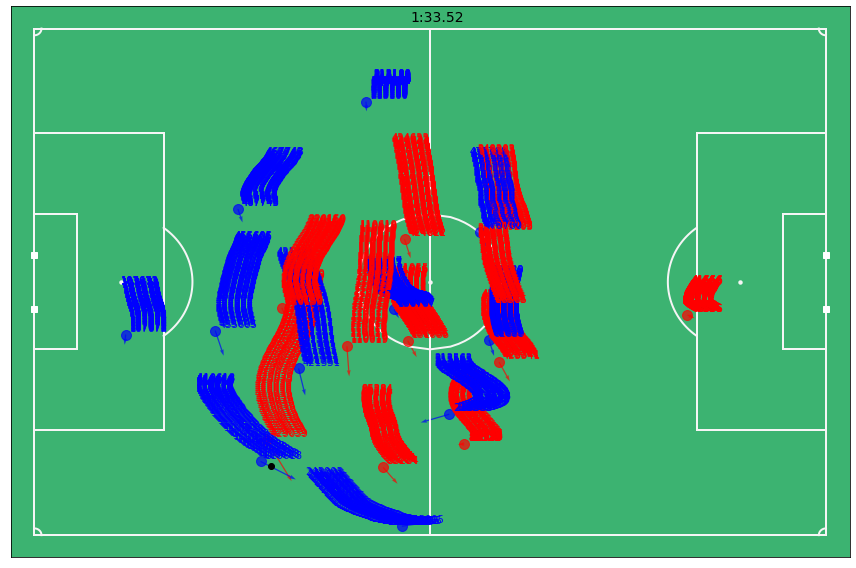

In [55]:
%%time
### This line is working but blanked it out because gif is already built
# Making a movie of the second home team goal
PLOTDIR = DATADIR
save_match_clip(tracking_home.loc[start_clip:end_clip],tracking_away.loc[start_clip:end_clip],PLOTDIR,fname='interception_ex',include_player_velocities=True,annotate=True)





In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = '/interception_ex.gif'

video = io.open(DATADIR+filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

Text(0.5, 1.0, 'Event counts during the Game')

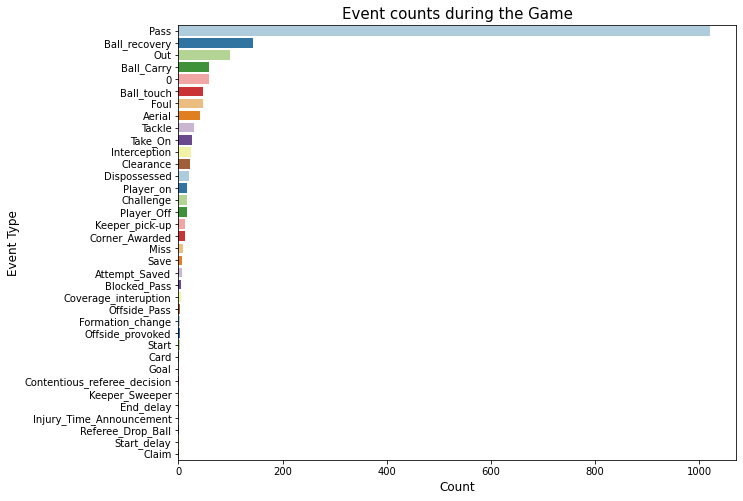

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(y='Subtype', palette='Paired',data=events_eda, order = events_eda['Subtype'].value_counts().index)
#plt.xticks(rotation=90)
plt.ylabel("Event Type",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.title('Event counts during the Game',fontsize=15)